In [36]:
import utils_regression
import uproot
import root_numpy
import ROOT

In [37]:
#I wrote some functions that retrieve the locations of all files.
dir(utils_regression)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'baseline_selection',
 'baseline_variables',
 'baseline_weight',
 'c',
 'campaigns',
 'd',
 'diboson_all_files',
 'diboson_dsids',
 'diboson_files_dict',
 'hmumu_files_dir',
 'hzz_files_dir',
 'key',
 'os',
 'signal_all_files',
 'signal_dsids',
 'signal_files_dict',
 'ttbar_all_files',
 'ttbar_dsids',
 'ttbar_files_dict',
 'zjets_all_files',
 'zjets_dsids',
 'zjets_files_dict']

In [38]:
#Here are all simulated signal files assocated with ggH and VBF Higgs Boson production
utils_regression.signal_all_files

['/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345106.root']

In [39]:
#lets open one of the files, and take a look inside
f = "/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16e.345097.root"
f_uproot = uproot.open(f)
f_uproot.keys()
#you can see one tree called "DiMuonNtuple"
#Lets open it and take a look inside:

[b'DiMuonNtuple;1']

In [40]:
tree = f_uproot["DiMuonNtuple"]
tree.keys()
#here are all of the variables... there are quite a lot. Lets not focus on too many of them right now. 

[b'EventInfo_RunNumber',
 b'MetaData_IsFullSim',
 b'EventInfo_ChannelNumber',
 b'EventInfo_LumiBlock',
 b'EventInfo_EventNumber',
 b'EventInfo_RndRunNumber',
 b'Event_CorrAverageMu',
 b'Event_CorrActualMu',
 b'Event_RandomVal',
 b'Truth_Boson_Mass',
 b'PMGWeightName',
 b'PMGWeightValue',
 b'EventInfo_PassTrigger',
 b'EventInfo_PassTriggerMatching',
 b'EventInfo_PassElectronTrigger',
 b'EventInfo_PassElectronTriggerMatch',
 b'EventInfo_Pass_HLT_xe70_mht',
 b'EventInfo_Pass_HLT_xe90_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_pufit_L1XE55',
 b'EventInfo_Pass_HLT_xe110_pufit_xe70_L1XE50',
 b'Muons_Charge_Lead',
 b'Muons_Charge_Sub',
 b'Muons_Type_Lead',
 b'Muons_Type_Sub',
 b'Muons_Multip',
 b'Muons_TruthOrigin_Lead',
 b'Muons_TruthOrigin_Sub',
 b'Muons_TruthType_Lead',
 b'Muons_TruthType_Sub',
 b'Muons_Minv_MuMu',
 b'Muons_PT_Lead',
 b'Muons_PT_Sub',
 b'Muons_Eta_Lead',
 b'Muons_Eta_Sub',
 b'Muons_Phi_Lead',
 b'Muons_Phi_Sub',
 b'Muons_Minv_MuMu_Fsr'

In [41]:
#Lets get a dataframe for all signal_files
import pandas as pd
dataframes = []
#these are all of the variables needed to calcualte the event weight
variables = ["Muons_Minv_MuMu"] + utils_regression.baseline_variables 
#This is the selection that is to be always applied when looking at events with two muons
selection = utils_regression.baseline_selection
for file in utils_regression.signal_all_files:
    dataframes.append(tree.pandas.df(variables).query(selection))
dataframes = pd.concat(dataframes)

In [42]:
hist_min= 100.0 #GeV
hist_max = 200.0 #GeV
nbins = 100 
size = (hist_max - hist_min)/float(nbins)
hist = ROOT.TH1D("InvMass", "InvMass", 100, 100.0, 200.0)
root_numpy.fill_hist(hist, dataframes.eval("Muons_Minv_MuMu").values, dataframes.eval(utils_regression.baseline_weight).values)

Warning in <TROOT::Append>: Replacing existing TH1: InvMass (Potential memory leak).



Applying ATLAS style settings...



Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


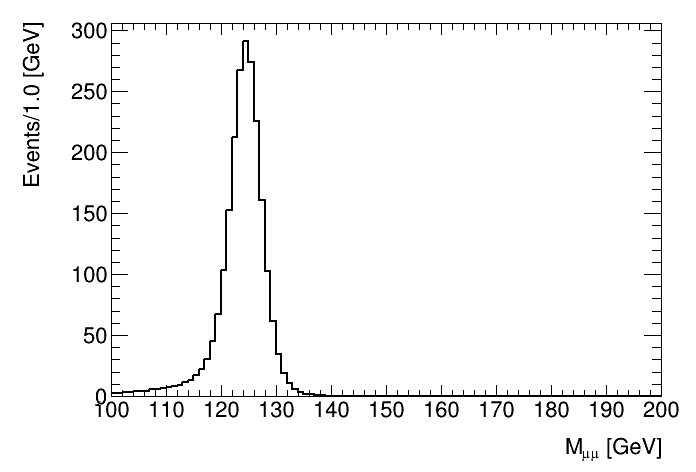

In [43]:
#Lets make a plot of the invariant mass distribution: 
c1 = ROOT.TCanvas("canv", "canv")
from atlasplots import atlas_style as astyle
astyle.SetAtlasStyle()
hist.Draw("HIST")
hist.GetXaxis().SetTitle("M_{#mu#mu} [GeV]")
hist.GetYaxis().SetTitle("Events/{} [GeV]".format(size))
c1.Draw()

In [44]:
#similarly you can try to do this the Z+Jets background:
#All of the z+jets background files, for only mc16a, for example
zjets_files = utils_regression.zjets_files_dict["mc16a"]
zjets_files

['/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364101.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364102.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364103.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364104.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364105.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364106.root',
 '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-

In [45]:
#OK That aside, we can also look at the mis measurement of the leptons, and try to understand it as a function of the pT and eta
#I am taking one Z+Jet file here as an example
test_file = '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root'
t = uproot.open(test_file)["DiMuonNtuple"]

In [46]:
t.keys()
#here you can see that the contents of the tree as before, is identical

[b'EventInfo_RunNumber',
 b'MetaData_IsFullSim',
 b'EventInfo_ChannelNumber',
 b'EventInfo_LumiBlock',
 b'EventInfo_EventNumber',
 b'EventInfo_RndRunNumber',
 b'Event_CorrAverageMu',
 b'Event_CorrActualMu',
 b'Event_RandomVal',
 b'Truth_Boson_Mass',
 b'EventInfo_PassTrigger',
 b'EventInfo_PassTriggerMatching',
 b'EventInfo_PassElectronTrigger',
 b'EventInfo_PassElectronTriggerMatch',
 b'EventInfo_Pass_HLT_xe70_mht',
 b'EventInfo_Pass_HLT_xe90_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_mht_L1XE50',
 b'EventInfo_Pass_HLT_xe110_pufit_L1XE55',
 b'EventInfo_Pass_HLT_xe110_pufit_xe70_L1XE50',
 b'Muons_Charge_Lead',
 b'Muons_Charge_Sub',
 b'Muons_Type_Lead',
 b'Muons_Type_Sub',
 b'Muons_Multip',
 b'Muons_TruthOrigin_Lead',
 b'Muons_TruthOrigin_Sub',
 b'Muons_TruthType_Lead',
 b'Muons_TruthType_Sub',
 b'Muons_Minv_MuMu',
 b'Muons_PT_Lead',
 b'Muons_PT_Sub',
 b'Muons_Eta_Lead',
 b'Muons_Eta_Sub',
 b'Muons_Phi_Lead',
 b'Muons_Phi_Sub',
 b'Muons_Minv_MuMu_Fsr',
 b'Muons_Minv_MuMu_Sigma',
 b'Muons_M

In [47]:
#Lets study the width of the mis-measurement distrbutions of each of the leptons
#Lets add the truth and reconstructed muon momenta
variables += ["Muons_PT_Lead", \
              "Muons_Eta_Lead", \
              "Muons_Phi_Lead", \
              "Muons_PT_Sub", \
              "Muons_Eta_Sub", \
              "Muons_Phi_Sub",\
              "Truth_PT_Lead_Muon", \
              "Truth_Eta_Lead_Muon" ,\
              "Truth_Phi_Lead_Muon",\
              "Truth_PT_Sub_Muon",\
              "Truth_Eta_Lead_Muon",\
              "Truth_Phi_Lead_Muon"]
zjet_dataframe = t.pandas.df(variables).query(utils_regression.baseline_selection)

In [48]:
zjet_dataframe

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
0              92.800499                      1     38.695007     10.847424   
1              89.534073                      1     30.027029     -6.701626   
2              85.061646                      1     32.741680      8.333323   
3              90.435577                      1     43.400837      9.562961   
4             116.854149                      1     57.511036     11.497942   
5              92.000847                      1     39.175838      0.000491   
6              89.954041                      1     51.297409      9.657840   
7              81.035339                      1     26.005234     11.772875   
8              93.551170                      1     44.795429    -11.230927   
9              73.816971                      1     31.289431    -10.918963   
11             93.873932                      1     41.894310      9.192299   
13             81.329552                      1     38.980984      9.100215   
14             44.784679                      1     17.376865     10.061410   
16             90.780373                      1     43.260933      8.834151   
17            107.739990                      1     41.838013      7.288063   
18             87.800079                      1     33.777420     10.661059   
19             87.688255                      1     31.420715      9.208808   
20             95.721436                      1     36.776733      9.899782   
23             76.772003                      1     30.661081      8.243889   
27             85.376305                      1     32.015835      0.872321   
28             85.041054                      1     39.170837      7.709909   
29             92.075119                      1     46.298401     10.940351   
30             88.744026                      1     33.562592     11.291110   
31             89.798401                      1     41.926239      9.718702   
32             88.861649                      1     35.588676     10.403110   
33             91.857582                      1     38.870636      9.735732   
34             87.228142                      1     37.830402     11.562196   
35             89.872856                      1     40.540977     10.379346   
36             68.315666                      1     29.804752     11.616770   
37             91.517319                      1     32.579021     12.475042   
...                  ...                    ...           ...           ...   
3725439        90.732338                      1     28.971102     10.452291   
3725440        91.870422                      1     34.619629      9.023530   
3725441        91.259056                      1     33.885017     -9.313231   
3725442        92.540398                      1     29.122957     10.761342   
3725444        93.410568                      1     33.213348    -10.772897   
3725445        89.671448                      1     43.696663      7.324502   
3725446        90.251663                      1     35.098831     10.725348   
3725448        90.738029                      1     37.828644     10.065392   
3725450        89.468178                      1     37.846592    -11.771339   
3725451        88.923759                      1     29.224737     12.111364   
3725452        91.333061                      1     38.300449    -14.291353   
3725453        89.185204                      1     41.666626     12.585575   
3725454        75.423363                      1     32.447815      8.945626   
3725455        93.309631                      1     35.463146      9.190464   
3725456        97.401344                      1     25.165136      8.074294   
3725457        89.120605                      1     40.796360      7.763956   
3725458        90.587303                      1     42.448376    -10.202579   
3725459        88.086540                      1     30.9374

In [50]:
x_lead = zjet_dataframe.eval("(Muons_PT_Lead - Truth_PT_Lead_Muon)/Muons_PT_Lead").values
x_sub = zjet_dataframe.eval("(Muons_PT_Sub - Truth_PT_Sub_Muon)/Muons_PT_Sub").values
#Lets put this back into the dataframe
zjet_dataframe["x_Lead"] = x_lead
zjet_dataframe["x_Sub"] = x_sub

In [51]:
zjet_dataframe

Muons_Minv_MuMu  PassesDiMuonSelection  Muons_PT_Sub  GlobalWeight  \
entry                                                                         
0              92.800499                      1     38.695007     10.847424   
1              89.534073                      1     30.027029     -6.701626   
2              85.061646                      1     32.741680      8.333323   
3              90.435577                      1     43.400837      9.562961   
4             116.854149                      1     57.511036     11.497942   
5              92.000847                      1     39.175838      0.000491   
6              89.954041                      1     51.297409      9.657840   
7              81.035339                      1     26.005234     11.772875   
8              93.551170                      1     44.795429    -11.230927   
9              73.816971                      1     31.289431    -10.918963   
11             93.873932                      1     41.894310      9.192299   
13             81.329552                      1     38.980984      9.100215   
14             44.784679                      1     17.376865     10.061410   
16             90.780373                      1     43.260933      8.834151   
17            107.739990                      1     41.838013      7.288063   
18             87.800079                      1     33.777420     10.661059   
19             87.688255                      1     31.420715      9.208808   
20             95.721436                      1     36.776733      9.899782   
23             76.772003                      1     30.661081      8.243889   
27             85.376305                      1     32.015835      0.872321   
28             85.041054                      1     39.170837      7.709909   
29             92.075119                      1     46.298401     10.940351   
30             88.744026                      1     33.562592     11.291110   
31             89.798401                      1     41.926239      9.718702   
32             88.861649                      1     35.588676     10.403110   
33             91.857582                      1     38.870636      9.735732   
34             87.228142                      1     37.830402     11.562196   
35             89.872856                      1     40.540977     10.379346   
36             68.315666                      1     29.804752     11.616770   
37             91.517319                      1     32.579021     12.475042   
...                  ...                    ...           ...           ...   
3725439        90.732338                      1     28.971102     10.452291   
3725440        91.870422                      1     34.619629      9.023530   
3725441        91.259056                      1     33.885017     -9.313231   
3725442        92.540398                      1     29.122957     10.761342   
3725444        93.410568                      1     33.213348    -10.772897   
3725445        89.671448                      1     43.696663      7.324502   
3725446        90.251663                      1     35.098831     10.725348   
3725448        90.738029                      1     37.828644     10.065392   
3725450        89.468178                      1     37.846592    -11.771339   
3725451        88.923759                      1     29.224737     12.111364   
3725452        91.333061                      1     38.300449    -14.291353   
3725453        89.185204                      1     41.666626     12.585575   
3725454        75.423363                      1     32.447815      8.945626   
3725455        93.309631                      1     35.463146      9.190464   
3725456        97.401344                      1     25.165136      8.074294   
3725457        89.120605                      1     40.796360      7.763956   
3725458        90.587303                      1     42.448376    -10.202579   
3725459        88.086540                      1     30.9374

Text(0.5, 0, '(pt reco - pt true)/(pt true)')

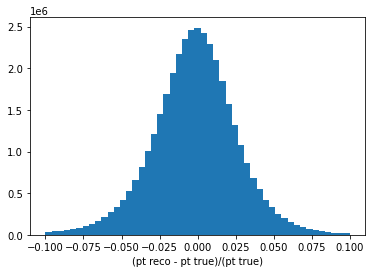

In [61]:
#Lets start by trying to understand how the width of the following distributions varies as a function of lepton
#kinematics
import numpy as np
import matplotlib.pyplot as plt
bins = np.linspace(-0.1, +0.1, 50)
x = np.concatenate( [zjet_dataframe.eval("x_Lead").values, zjet_dataframe.eval("x_Sub").values], axis=0)
weights = np.concatenate([zjet_dataframe.eval(utils_regression.baseline_weight).values, zjet_dataframe.eval(utils_regression.baseline_weight).values], axis=0)
plt.hist(x, weights = weights, bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")